In [1]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def print_network_graph(ssoln_dict:dict, eps:float=0.0, norm_factor:float=1.0):
    G = nx.DiGraph()
    
    
    # ssoln_dict = iter_ssoln_dict[1]
    nodes = {
    'Location 1': {
        'Capacity': ssoln_dict['Cap_P[loc1,com1_process,0]']/norm_factor if 'Cap_P[loc1,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc1,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc1,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 2': {
        'Capacity': ssoln_dict['Cap_P[loc2,com1_process,0]']/norm_factor if 'Cap_P[loc2,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc2,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc2,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 3': {
        'Capacity': ssoln_dict['Cap_P[loc3,com1_process,0]']/norm_factor if 'Cap_P[loc3,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc3,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc3,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 4': {
        'Capacity': ssoln_dict['Cap_P[loc4,com1_process,0]']/norm_factor if 'Cap_P[loc4,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc4,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc4,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 5': {
        'Capacity': ssoln_dict['Cap_P[loc5,com1_process,0]']/norm_factor if 'Cap_P[loc5,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc5,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc5,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 6': {
        'Capacity': ssoln_dict['Cap_P[loc6,com1_process,0]']/norm_factor if 'Cap_P[loc6,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc6,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc6,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 7': {
        'Capacity': ssoln_dict['Cap_P[loc7,com1_process,0]']/norm_factor if 'Cap_P[loc7,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc7,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc7,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    }
    
    # Add nodes to the graph
    G.add_nodes_from(nodes.keys())
    
    # Define edges (connections between nodes)
    edges = [
        ('Location 1', 'Location 2', {'weight': ssoln_dict['Cap_F[loc1,loc2,truck12,0]']/norm_factor if 'Cap_F[loc1,loc2,truck12,0]' in ssoln_dict.keys() else 0}),
        ('Location 1', 'Location 3', {'weight': ssoln_dict['Cap_F[loc1,loc3,truck13,0]']/norm_factor if 'Cap_F[loc1,loc3,truck13,0]' in ssoln_dict.keys() else 0}),
        ('Location 1', 'Location 5', {'weight': ssoln_dict['Cap_F[loc1,loc5,plane15,0]']/norm_factor if 'Cap_F[loc1,loc5,plane15,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 4', {'weight': ssoln_dict['Cap_F[loc2,loc4,truck24,0]']/norm_factor if 'Cap_F[loc2,loc4,truck24,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 5', {'weight': ssoln_dict['Cap_F[loc2,loc5,truck25,0]']/norm_factor if 'Cap_F[loc2,loc5,truck25,0]' in ssoln_dict.keys() else 0}),
        ('Location 3', 'Location 4', {'weight': ssoln_dict['Cap_F[loc3,loc4,truck34,0]']/norm_factor if 'Cap_F[loc3,loc4,truck34,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 5', {'weight': ssoln_dict['Cap_F[loc4,loc5,truck45,0]']/norm_factor if 'Cap_F[loc4,loc5,truck45,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 7', {'weight': ssoln_dict['Cap_F[loc4,loc7,truck47,0]']/norm_factor if 'Cap_F[loc4,loc7,truck47,0]' in ssoln_dict.keys() else 0}),
        ('Location 6', 'Location 4', {'weight': ssoln_dict['Cap_F[loc6,loc4,truck64,0]']/norm_factor if 'Cap_F[loc6,loc4,truck64,0]' in ssoln_dict.keys() else 0}),
        # ('Location 6', 'Location 5', {'weight': ssoln_dict['Cap_F[loc6,loc5,plane65,0]'] if 'Cap_F[loc6,loc5,plane65,0]' in ssoln_dict.keys() else 0}),
        ('Location 7', 'Location 5', {'weight': ssoln_dict['Cap_F[loc7,loc5,truck75,0]']/norm_factor if 'Cap_F[loc7,loc5,truck75,0]' in ssoln_dict.keys() else 0}),
    ]
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Define fixed positions for nodes
    fixed_positions = {
        'Location 1': (-2, 2),
        'Location 2': (0, 2),
        'Location 3': (-2, 0),
        'Location 4': (0, 0),
        'Location 5': (2, 0),
        'Location 6': (-2, -2),
        'Location 7': (1, -2)
    }
    
    # Create custom labels combining multiple pieces of information
    node_labels = {node: f"Capacity: {data['Capacity']:.2f}\nInventory: {data['Inventory']:.2f}" for node, data in nodes.items()}
    
    # Draw nodes and edges with fixed positions
    nx.draw_networkx_nodes(G, fixed_positions, node_color='skyblue', node_size=700)
    nx.draw_networkx_edges(G, fixed_positions, edgelist=edges, arrowstyle='simple', arrowsize=15)
    nx.draw_networkx_labels(G, fixed_positions, labels=node_labels, font_size=8, font_color='red', bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.3"))
    
    # Draw edge labels (optional)
    edge_labels = {(u, v): round(d['weight'],3) for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, fixed_positions, edge_labels=edge_labels, label_pos=0.4, font_size=8)
    
    # Expand plot limits to prevent cutoff
    x_values, y_values = zip(*fixed_positions.values())
    plt.xlim(min(x_values) - 1, max(x_values) + 1)
    plt.ylim(min(y_values) - 1, max(y_values) + 1)
    
    # Show the plot
    plt.title(f"Supply Chain Network considering fill rate of {eps}")
    # plt.figure(figsize=(16,12))
    plt.show()  

In [3]:
eps = 0.9

In [4]:
with open(f'HPRC_results/FD_4096_{int(eps * 10):02d}_final_results_HP.pkl', 'rb') as file:
    load = pickle.load(file)

load

{4096: {'Expected Cost UI': 335512.4275322915,
  'Expected Resilience': 0.9999984770277187,
  'First Stage Cost': 50932.325,
  'Execution Time': -3536.2400941848755}}

In [5]:
with open(f'HPRC_results/ssoln_4096_{int(eps * 10):02d}_UI_HP.pkl', 'rb') as file:
    load_ssoln = pickle.load(file)

In [6]:
load_ssoln['Cap_P[loc6,procure com1,0]']/91

100.0

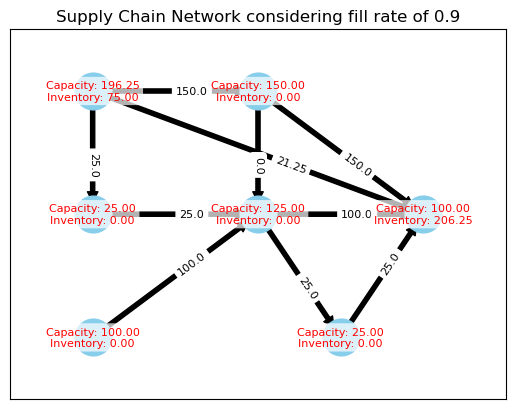

In [7]:
print_network_graph(ssoln_dict=load_ssoln, eps=eps, norm_factor=91)

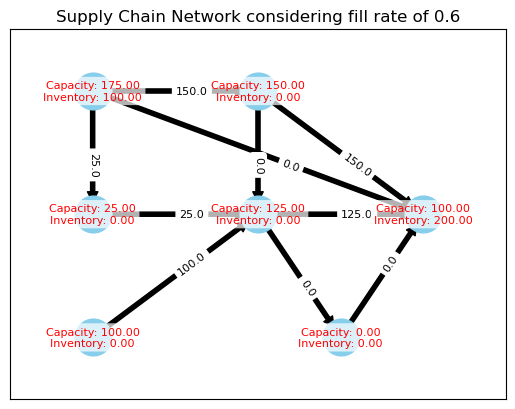

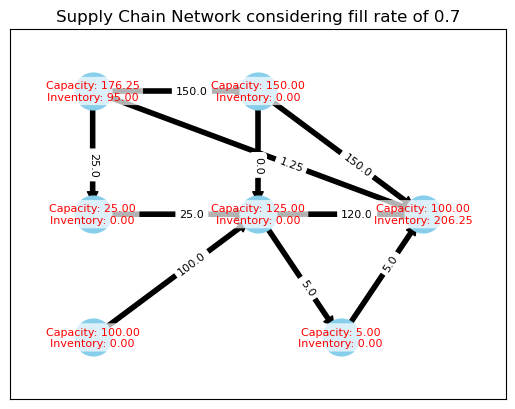

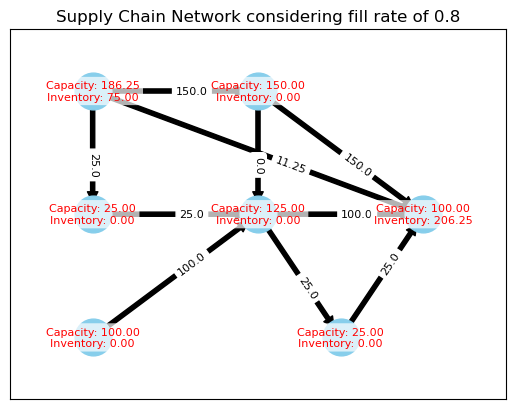

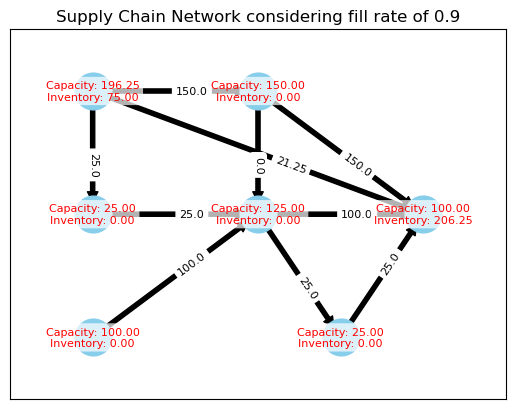

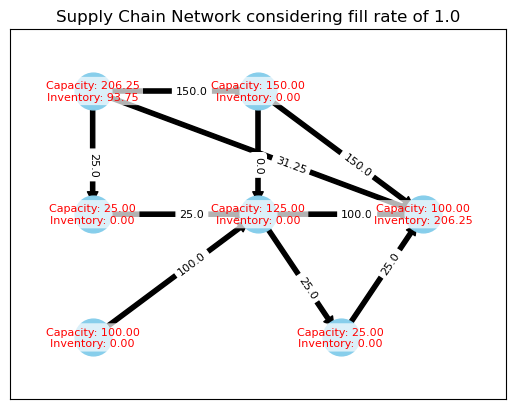

In [8]:
for eps in [0.6, 0.7, 0.8, 0.9, 1.0]:
    with open(f'HPRC_results/ssoln_4096_{int(eps * 10):02d}_UI_HP.pkl', 'rb') as file:
        load_ssoln = pickle.load(file)
    print_network_graph(ssoln_dict=load_ssoln, eps=eps, norm_factor=91)

In [9]:
with open(f'HPRC_results/output_4096_07_UI_HP.pkl', 'rb') as file:
    load_output_dict = pickle.load(file)

In [10]:
# load_output_dict

In [13]:
load_output_dict[list(load_output_dict.keys())[0]]['Cap_S']

{('loc1', 'com1_store_com1_in_stored', 0): 8645.0,
 ('loc2', 'com1_store_com1_in_stored', 0): 0.0,
 ('loc3', 'com1_store_com1_in_stored', 0): 0.0,
 ('loc4', 'com1_store_com1_in_stored', 0): 0.0,
 ('loc5', 'com1_store_com1_in_stored', 0): 18768.75,
 ('loc6', 'com1_store_com1_in_stored', 0): 0.0,
 ('loc7', 'com1_store_com1_in_stored', 0): 0.0}

In [15]:
18768.75/91

206.25

In [16]:
for i in load_output_dict[list(load_output_dict.keys())[0]]['Cap_S']:
    print(load_output_dict[list(load_output_dict.keys())[0]]['Cap_S'][i])


8645.0
0.0
0.0
0.0
18768.75
0.0
0.0
